In [13]:
import sys
import os
from pathlib import Path

sys.path.append(sys.path[0] + '/src')

import torch
import pandas as pd
from extracting_embedding import extract_embedding
from visualization import tsne,visualize
import utils

# import visualization
# import importlib 
# importlib.reload(visualization)

device = utils.getting_device()
#load data from file
all_df=pd.read_csv("data/RosettaCodeData.csv")


languages = ['COBOL','Fortran','C','Haskell','Scala','Clojure', 'Java', 'C++', 'Python', 'Ada', 'Pascal', 'AArch64-Assembly']

filtered_df = all_df.dropna()
rows_to_drop = filtered_df["task"].str.contains('Empty-program')
df = filtered_df[~rows_to_drop]

part_df = df[df['language'].isin(languages)].reset_index(drop=True)
part_df

device: cuda


,Unnamed: 0,task,language,code
0,9,100-doors,AArch64-Assembly,/* ARM assembly AARCH64 Raspberry PI 3B */\n/*...
1,10,100-doors,AArch64-Assembly,/* ARM assembly AARCH64 Raspberry PI 3B */\n/*...
2,20,100-doors,Ada,with Ada.Text_Io; use Ada.Text_Io;\n\n procedu...
3,21,100-doors,Ada,with Ada.Text_Io; use Ada.Text_Io;\n with Ada....
4,82,100-doors,C,#include <stdio.h>\n\nint main()\n{\n char is...
...,...,...,...,...
14984,114343,Zumkeller-numbers,Haskell,"import Data.List (group, sort)\nimport Data.Li..."
14985,114346,Zumkeller-numbers,Java,import java.util.ArrayList;\nimport java.util....
14986,114354,Zumkeller-numbers,Pascal,program zumkeller;\n//https://oeis.org/A083206...
14987,114358,Zumkeller-numbers,Python,from sympy import divisors\n\nfrom sympy.combi...


## BERT Embedding

In [4]:
bert_path = extract_embedding(part_df, device, model='bert', max_len = 100)
## bert_path = 'out/bert_14989.pt'

out/bert_14989.pt
Model vertified: BERT


Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Starting extract embeddings......
Time elapsed: 21667.54 seconds, Data processed:10000
End of extracting...Number of record: torch.Size([14989, 768])


In [8]:
bert_emb = torch.load('out/bert_14989.pt', map_location="cpu")

In [9]:
tsne_df = tsne(bert_emb, part_df)

torch.Size([14989, 768]) 12 1221
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14989 samples in 0.003s...
[t-SNE] Computed neighbors for 14989 samples in 3.633s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14989
[t-SNE] Computed conditional probabilities for sample 2000 / 14989
[t-SNE] Computed conditional probabilities for sample 3000 / 14989
[t-SNE] Computed conditional probabilities for sample 4000 / 14989
[t-SNE] Computed conditional probabilities for sample 5000 / 14989
[t-SNE] Computed conditional probabilities for sample 6000 / 14989
[t-SNE] Computed conditional probabilities for sample 7000 / 14989
[t-SNE] Computed conditional probabilities for sample 8000 / 14989
[t-SNE] Computed conditional probabilities for sample 9000 / 14989
[t-SNE] Computed conditional probabilities for sample 10000 / 14989
[t-SNE] Computed conditional probabilities for sample 11000 / 14989
[t-SNE] Computed conditional probabilities for sample 12000 / 14989
[t-SNE] Computed

In [31]:
import visualization
import importlib 
importlib.reload(visualization)

<module 'visualization' from '/mnt/j/simin/codeLang/naturalness/visualization.py'>

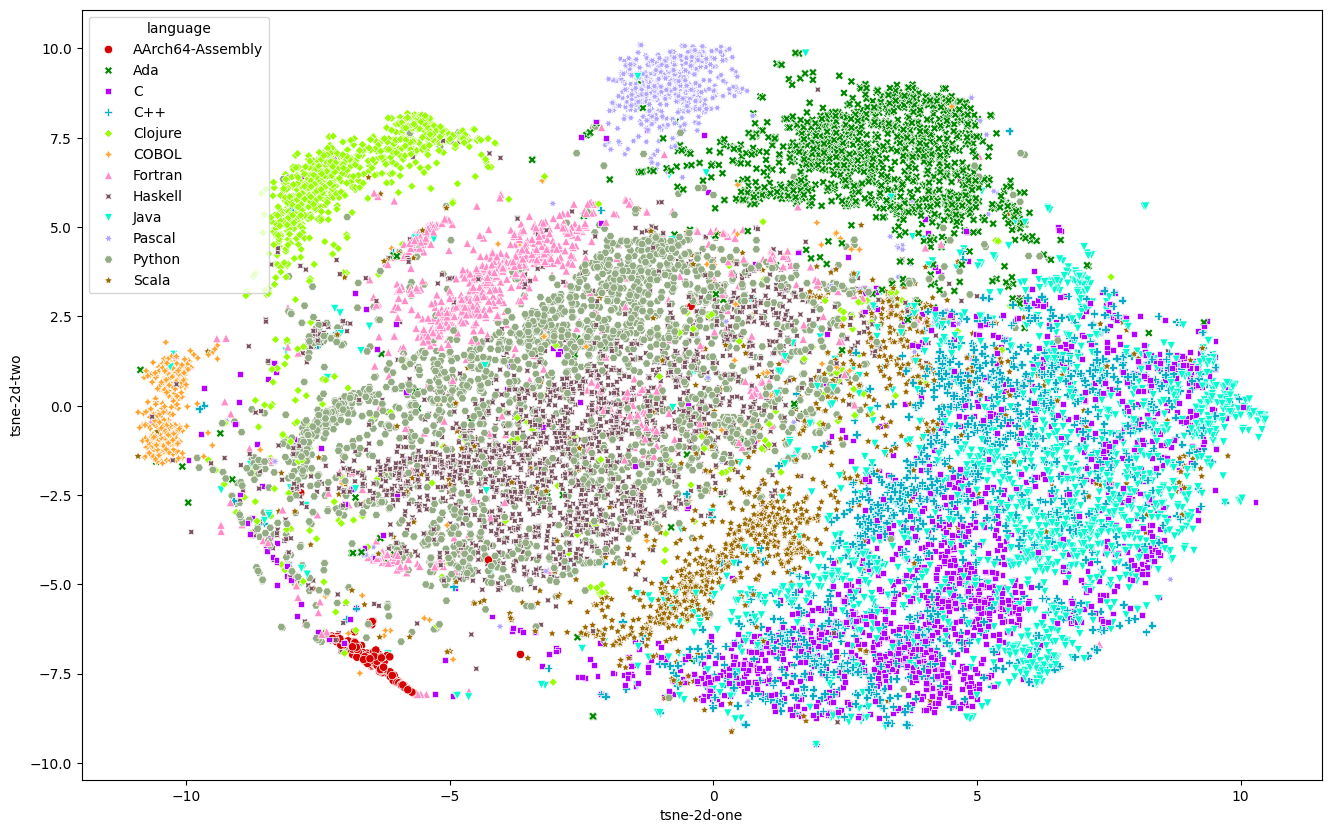

In [26]:
visualization.visualize(tsne_df, part_df, model = 'bert', data_type = 'language')

## GPT2 Embedding

In [27]:
gpt_path = extract_embedding(part_df, device, model='gpt', max_len = 100)
## gpt_path = 'out/bert_14802.pt'
gpt_emb = torch.load(gpt_path, map_location="cpu")

out/gpt_14989.pt
Model vertified: GPT
Starting extract embeddings......
Time elapsed: 9808.93 seconds, Data processed:10000
End of extracting...Number of record: torch.Size([14989, 768])


In [28]:
tsne_df = tsne(gpt_emb, part_df)

torch.Size([14989, 768]) 12 1221
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14989 samples in 0.003s...
[t-SNE] Computed neighbors for 14989 samples in 2.753s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14989
[t-SNE] Computed conditional probabilities for sample 2000 / 14989
[t-SNE] Computed conditional probabilities for sample 3000 / 14989
[t-SNE] Computed conditional probabilities for sample 4000 / 14989
[t-SNE] Computed conditional probabilities for sample 5000 / 14989
[t-SNE] Computed conditional probabilities for sample 6000 / 14989
[t-SNE] Computed conditional probabilities for sample 7000 / 14989
[t-SNE] Computed conditional probabilities for sample 8000 / 14989
[t-SNE] Computed conditional probabilities for sample 9000 / 14989
[t-SNE] Computed conditional probabilities for sample 10000 / 14989
[t-SNE] Computed conditional probabilities for sample 11000 / 14989
[t-SNE] Computed conditional probabilities for sample 12000 / 14989
[t-SNE] Computed

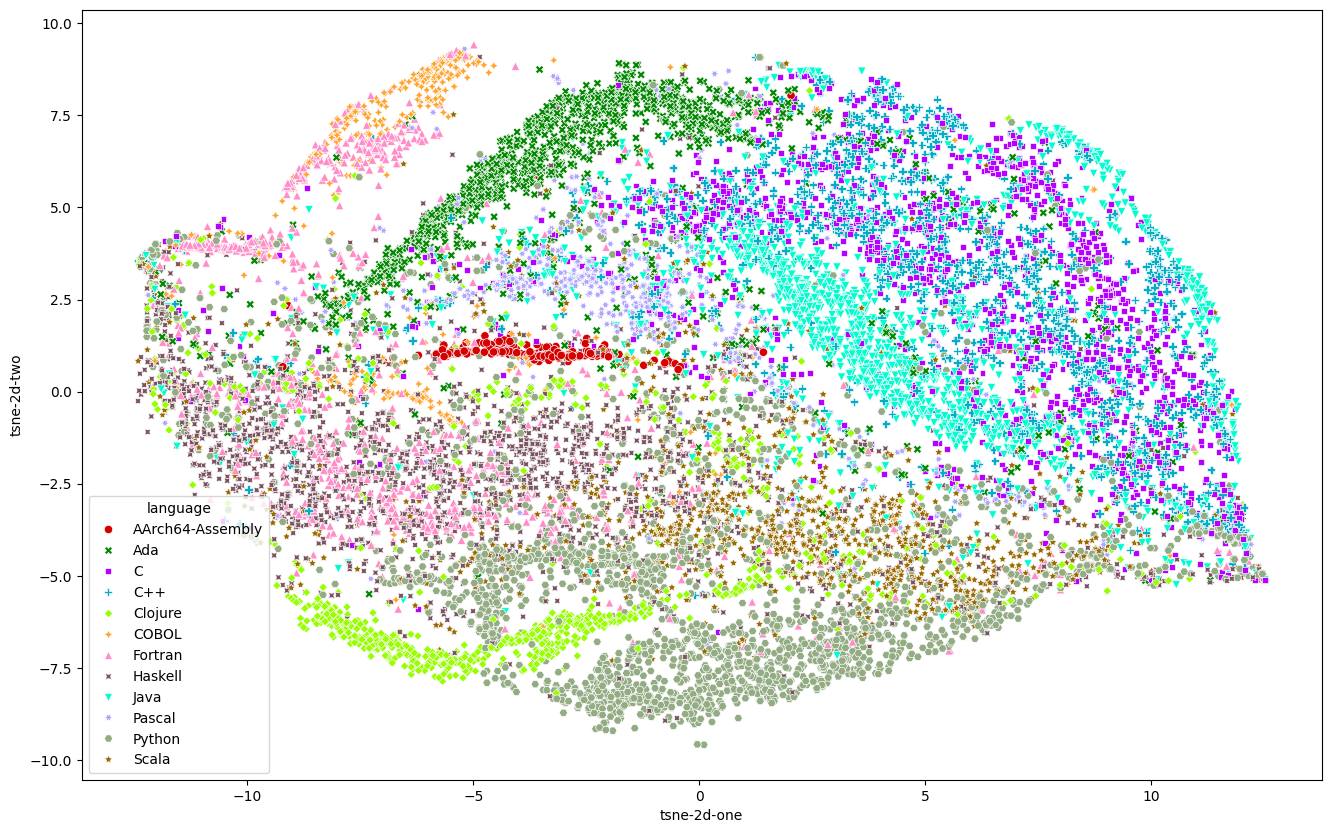

In [35]:
visualization.visualize(tsne_df, part_df, model = 'gpt', data_type = 'language')